<a href="https://colab.research.google.com/github/qerenny/MoVD/blob/main/%D0%9F%D0%A03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек и датасетов

## Импорт бибилиотек

In [229]:
import re
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
from IPython.display import HTML
import random
from scipy import stats
import seaborn as sns
import plotly.express as px
import os

## Коннект с Kaggle и установка датасетов

In [230]:
!mkdir /root/.kaggle
!touch /root/.kaggle/kaggle.json
!echo '{"username":"qerenny","key":"942b9c55424f519acfcf54c19638e1f2"}' > /root/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [231]:
%%capture
datasets = ['rkiattisak/student-performance-in-mathematics',
            'denisadutca/education-indicators-2014-worldwide',
            'joebeachcapital/students-performance']

for dataset in datasets:
    !kaggle datasets download -d {dataset}
    !unzip {dataset.split('/')[1]}

In [232]:
folder_path = "/content"
files = os.listdir(folder_path)

for file_name in files:
    if ' ' in file_name:
        new_name = file_name.replace(' ', '-')

        old_path = os.path.join(folder_path, file_name)
        new_path = os.path.join(folder_path, new_name)

        os.rename(old_path, new_path)

## Чтение датасетов

In [233]:
df_prediction = pd.read_csv('/content/exams.csv')
df_education = pd.read_csv('/content/Education-Indicators-2014.csv')
df_perfomance = pd.read_csv('/content/StudentsPerformance_with_headers.csv')

## Функция для вывода основной информации для датасетов

In [234]:
def print_dataframe_info(df):
    print('Основная информация:\n')
    print(f"Размерность: {df.shape[0]} рядов x {df.shape[1]} колонок")

    column_info = pd.concat([
        df.dtypes.to_frame('Тип'),
        df.isna().sum().to_frame('Пустые значения'),
        df.nunique().to_frame('Уникальные значения')
    ], axis=1).T

    display(column_info)

    print("\nПример строк:")
    display(df.sample(5))

    msno.matrix(df, color=(0.5, 0.7, 0.5))

# Датасеты

## Student performance prediction

https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics

|Признак|Тип|Шкала|
|-------|---|-----|
|Gender | Категориальный | Номинальная |
| Race/ethnicity              | Категориальный | Номинальная |
| Parental level of education | Категориальный | Порядковая   |
| Lunch                       | Категориальный | Номинальная |
| Test preparation course     | Категориальный | Номинальная |
| Math score                  | Числовой        | Интервальная |
| Reading score               | Числовой        | Интервальная |
| Writing score               | Числовой        | Интервальная |

Основная информация:

Размерность: 1000 рядов x 8 колонок


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Тип,object,object,object,object,object,int64,int64,int64
Пустые значения,0,0,0,0,0,0,0,0
Уникальные значения,2,5,6,2,2,79,71,74



Пример строк:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
936,male,group D,associate's degree,standard,none,72,62,60
451,male,group B,master's degree,free/reduced,none,76,68,70
542,female,group D,some high school,standard,none,62,68,65
798,female,group B,associate's degree,free/reduced,none,61,64,63
811,female,group B,some high school,standard,none,44,65,59


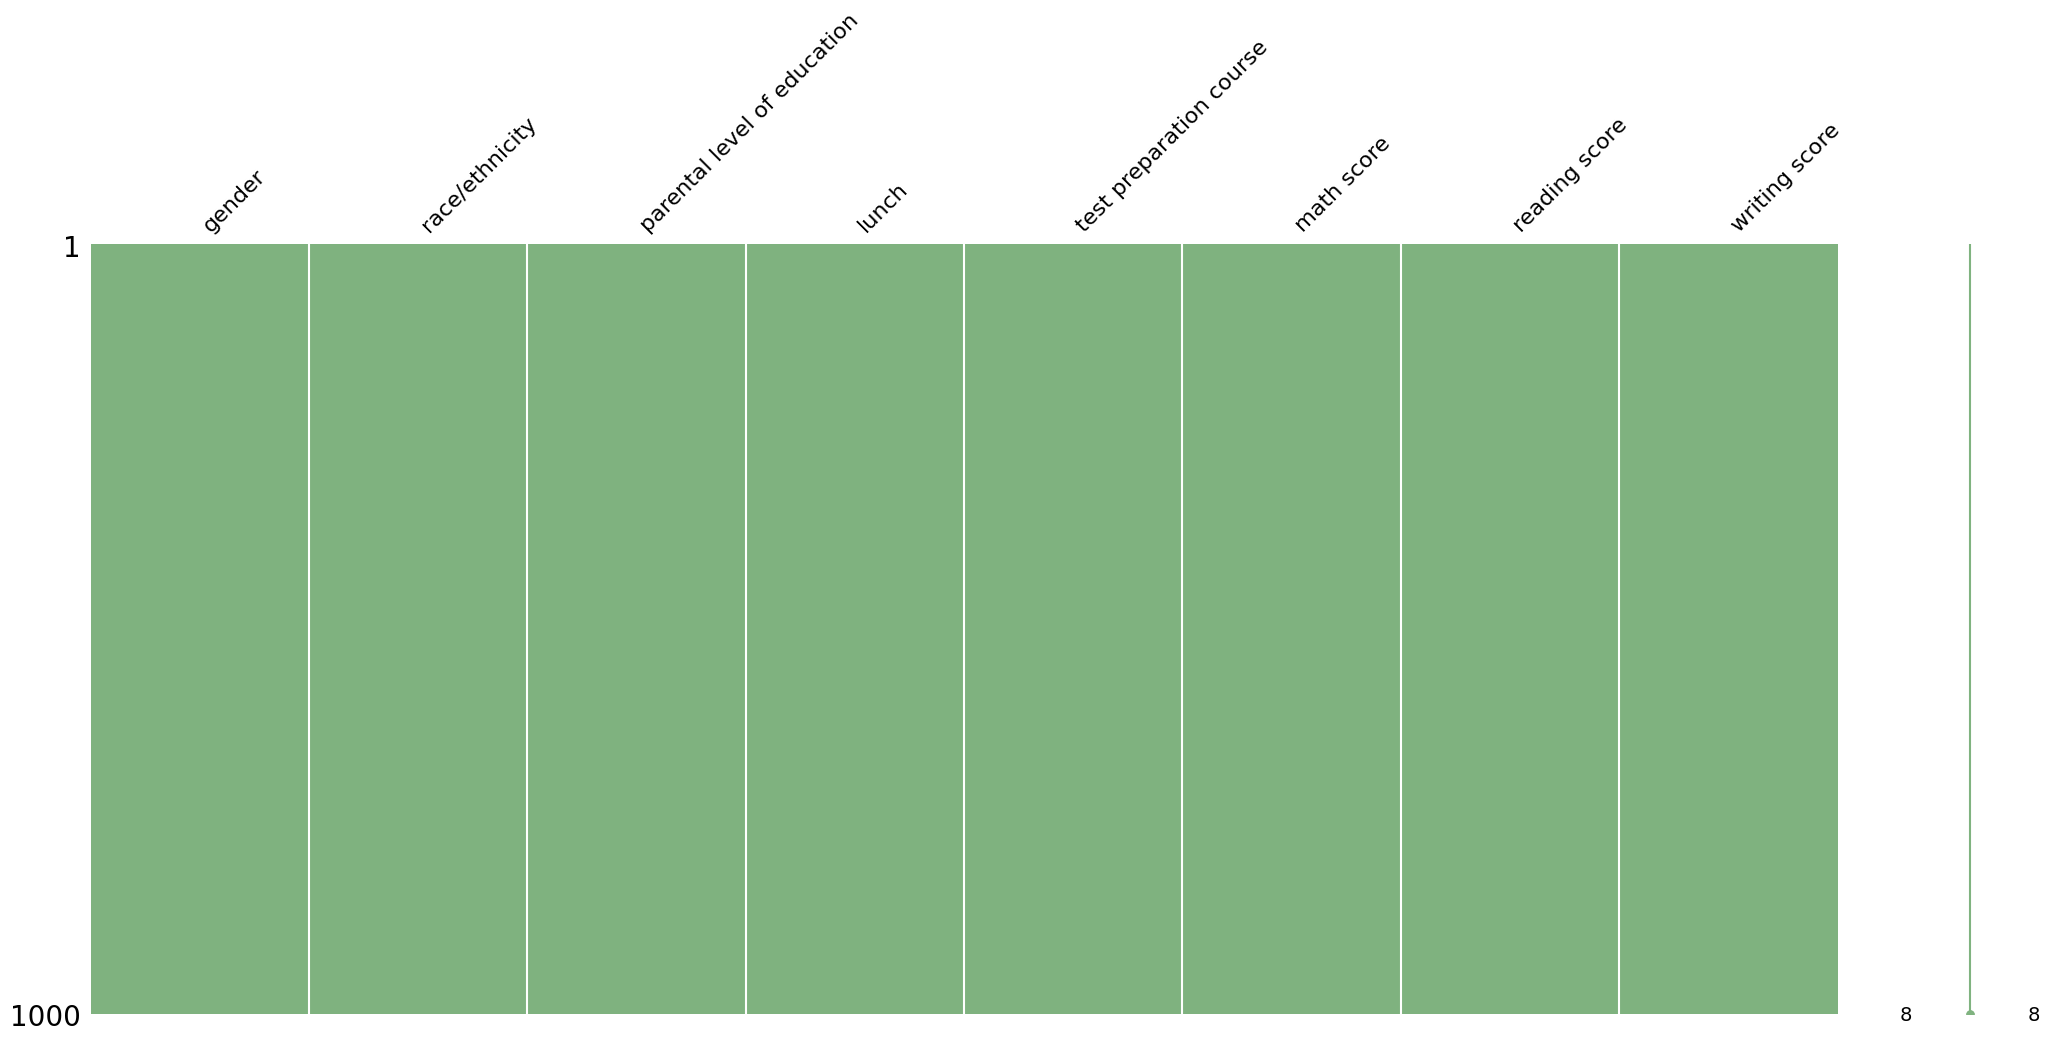

In [235]:
print_dataframe_info(df_prediction)

Этот набор данных содержит информацию об успеваемости старшеклассников по математике, включая их оценки и демографическую информацию.


### Для каких целей этот датасет может быть использован:

1. Анализ влияния демографических факторов на успеваемость: Исследование, как различные факторы, такие как пол, раса/этническая принадлежность и уровень образования родителей, могут влиять на успех учащихся в математике и других предметах.

2. Оценка эффективности программ образования: Изучение того, как успешно студенты, прошедшие курсы подготовки к тестам, справляются с математическими оценками по сравнению с теми, кто не проходил такие курсы.

3. Разработка моделей прогнозирования успеваемости: Использование машинного обучения для создания моделей, которые могут предсказывать успеваемость учащихся на основе их демографических характеристик, уровня образования родителей и других переменных.

4. Оценка результатов образовательных программ: Понимание, насколько хорошо студенты показывают успехи в различных аспектах обучения, таких как математика, чтение и письмо, и какие факторы могут влиять на эти результаты.

5. Исследование социальных неравенств: Анализ того, как социальные и демографические факторы могут создавать неравенство в образовании и какие шаги можно предпринять для устранения этого неравенства.

## Education DataSet

https://www.kaggle.com/datasets/denisadutca/education-indicators-2014-worldwide

| Признак                            | Тип         | Шкала       |
|------------------------------------|-------------|-------------|
| Population                         | Числовой      | Порядковая   |
| GDP                                | Числовой      | Интервальная |
| Percentage of repeaters in Primary Education | Числовой  | Процентная  |
| Out-of-school children of Primary School   | Числовой  | Абсолютная  |
| Enrolment in Secondary Education   | Числовой      | Абсолютная  |
| Enrolment in Primary Education    | Числовой      | Абсолютная  |
| Unemployment                       | Числовой      | Процентная  |
| Life expectancy at birth          | Числовой      | Интервальная |
| Theoretical Duration of Primary Education  | Числовой  | Порядковая   |

Основная информация:

Размерность: 107 рядов x 10 колонок


,Country Name,PPT,GDP,PRPE,OOCP,ESE,EPE,UNEMP,LEB,TDP
Тип,object,int64,float64,float64,int64,int64,int64,float64,float64,int64
Пустые значения,0,0,0,0,0,0,0,0,0,0
Уникальные значения,107,105,105,96,105,105,105,90,101,4



Пример строк:


,Country Name,PPT,GDP,PRPE,OOCP,ESE,EPE,UNEMP,LEB,TDP
72,Myanmar,53437159,6.557473e+10,0.20,284278,3191268,5177276,3.30,65.86,5
98,Latin America(IDA),610149938,6.019890e+12,4.83,3533954,62970044,64228640,6.60,74.83,6
69,Middle income,5458860818,2.791960e+13,2.88,39207684,441802272,537632896,5.60,70.64,6
83,Pakistan,185044286,2.443610e+11,2.28,5611792,11286628,19431564,5.20,66.18,5
33,European Union,508344735,1.857380e+13,1.59,409889,42786516,28606016,10.21,80.67,6


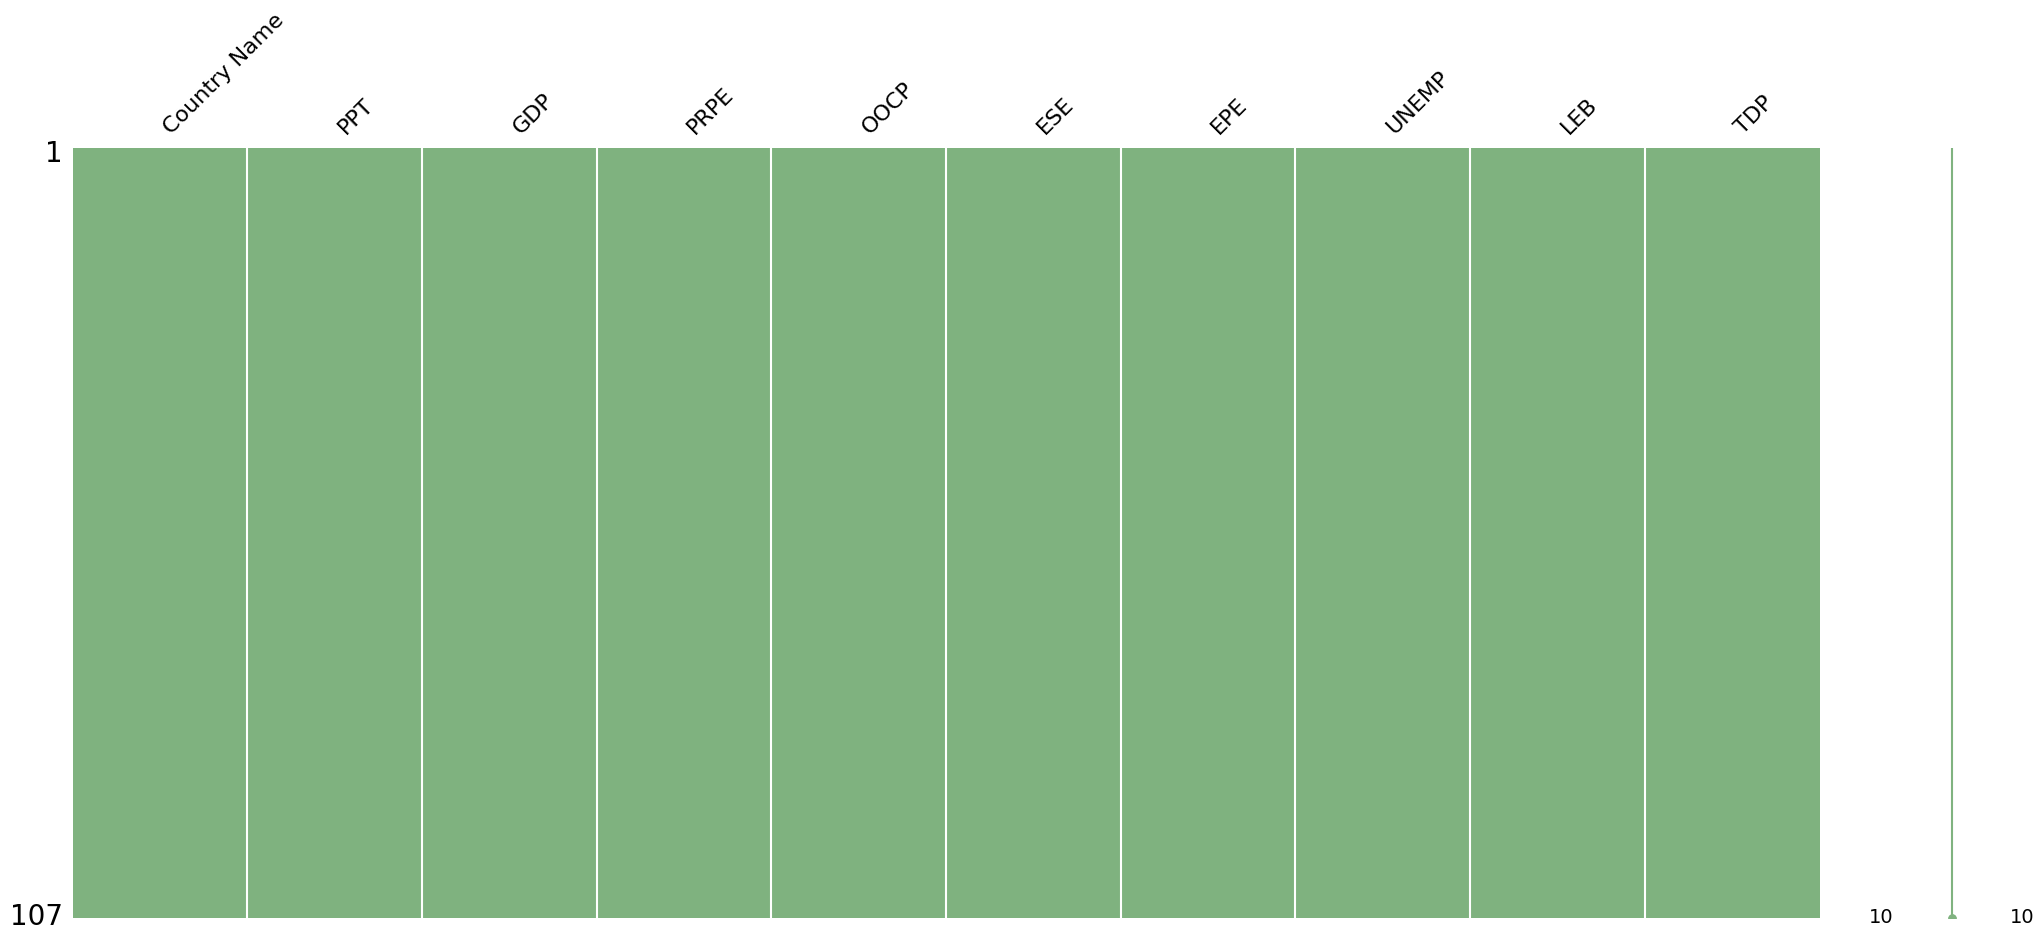

In [236]:
print_dataframe_info(df_education)

Этот набор данных включает уровень школьного образования в 107 странах мира. Он может быть использован для анализа взаимосвязи между сферами образования, демографией и экономикой. С его помощью можно исследовать, как показатели, такие как уровень безработицы, ВВП и продолжительность жизни, связаны с образованием и посещаемостью школ.


### Для каких целей этот датасет может быть использован:

1. Для сравнительного анализа уровня образования между различными странами, что может помочь в выявлении успешных методов образования и тех областей, где требуется улучшение.

2. Для понимания влияния различных факторов, таких как ВВП, безработица и ожидаемая продолжительность жизни, на уровень образования в различных странах.

3. Для разработки образовательных политик и программ национального и международного уровня, основанных на данных о сравнительном уровне образования.

4. Для идентификации тенденций и изменений в сфере образования во времени и в разных регионах мира.

5. Для поддержки исследований и проектов, направленных на повышение качества образования и улучшение доступности образовательных ресурсов в мире.

## Students Performance

https://www.kaggle.com/datasets/joebeachcapital/students-performance

| Признак                                                   | Тип           | Шкала       |
|-----------------------------------------------------------|---------------|-------------|
| Student ID                                               | Идентификатор  | Уникальный   |
| Student Age                                              | Категориальный | Порядковая   |
| Sex                                                      | Категориальный | Номинальная  |
| Graduated high-school type                               | Категориальный | Номинальная  |
| Scholarship type                                         | Категориальный | Порядковая   |
| Additional work                                          | Категориальный | Номинальная  |
| Regular artistic or sports activity                      | Категориальный | Номинальная  |
| Do you have a partner                                    | Категориальный | Номинальная  |
| Total salary if available                                | Категориальный | Порядковая   |
| Transportation to the university                         | Категориальный | Номинальная  |
| Accommodation type in Cyprus                             | Категориальный | Номинальная  |
| Mothers’ education                                       | Категориальный | Порядковая   |
| Fathers’ education                                       | Категориальный | Порядковая   |
| Number of sisters/brothers (if available)                | Категориальный | Порядковая   |
| Parental status                                          | Категориальный | Номинальная  |
| Mothers’ occupation                                      | Категориальный | Номинальная  |
| Fathers’ occupation                                      | Категориальный | Номинальная  |
| Weekly study hours                                       | Категориальный | Порядковая
| Reading frequency (non-scientific books/journals)          | Категориальный | Порядковая   |
| Reading frequency (scientific books/journals)              | Категориальный | Порядковая   |
| Attendance to the seminars/conferences related to the department | Категориальный | Номинальная  |
| Impact of your projects/activities on your success         | Категориальный | Номинальная  |
| Attendance to classes                                      | Категориальный | Порядковая   |
| Preparation to midterm exams 1                             | Категориальный | Номинальная  |
| Preparation to midterm exams 2                             | Категориальный | Порядковая   |
| Taking notes in classes                                   | Категориальный | Порядковая   |
| Listening in classes                                      | Категориальный | Порядковая   |
| Discussion improves my interest and success in the course | Категориальный | Порядковая   |
| Flip-classroom                                            | Категориальный | Порядковая   |
| Cumulative grade point average in the last semester       | Категориальный | Порядковая   |
| Expected Cumulative grade point average in the graduation  | Категориальный | Порядковая   |
| Course ID                                                 | Идентификатор  | Уникальный   |
| OUTPUT Grade                                              | Категориальный | Порядковая   |


Основная информация:

Размерность: 145 рядов x 33 колонок


,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
Тип,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
Пустые значения,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Уникальные значения,145,3,2,3,5,2,2,2,5,4,...,3,3,3,3,3,3,5,4,9,8



Пример строк:


,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
86,STUDENT87,2,2,2,4,2,2,2,1,4,...,1,1,3,2,3,2,5,4,5,5
54,STUDENT55,2,2,2,3,2,2,2,3,4,...,1,2,3,1,3,1,5,3,1,3
126,STUDENT127,1,1,1,4,1,1,1,3,2,...,2,1,3,3,3,1,2,2,9,3
57,STUDENT58,2,2,2,3,1,1,2,1,1,...,1,1,3,2,3,1,5,4,1,4
5,STUDENT6,2,2,2,3,2,2,2,2,1,...,1,1,1,2,1,2,4,4,1,2


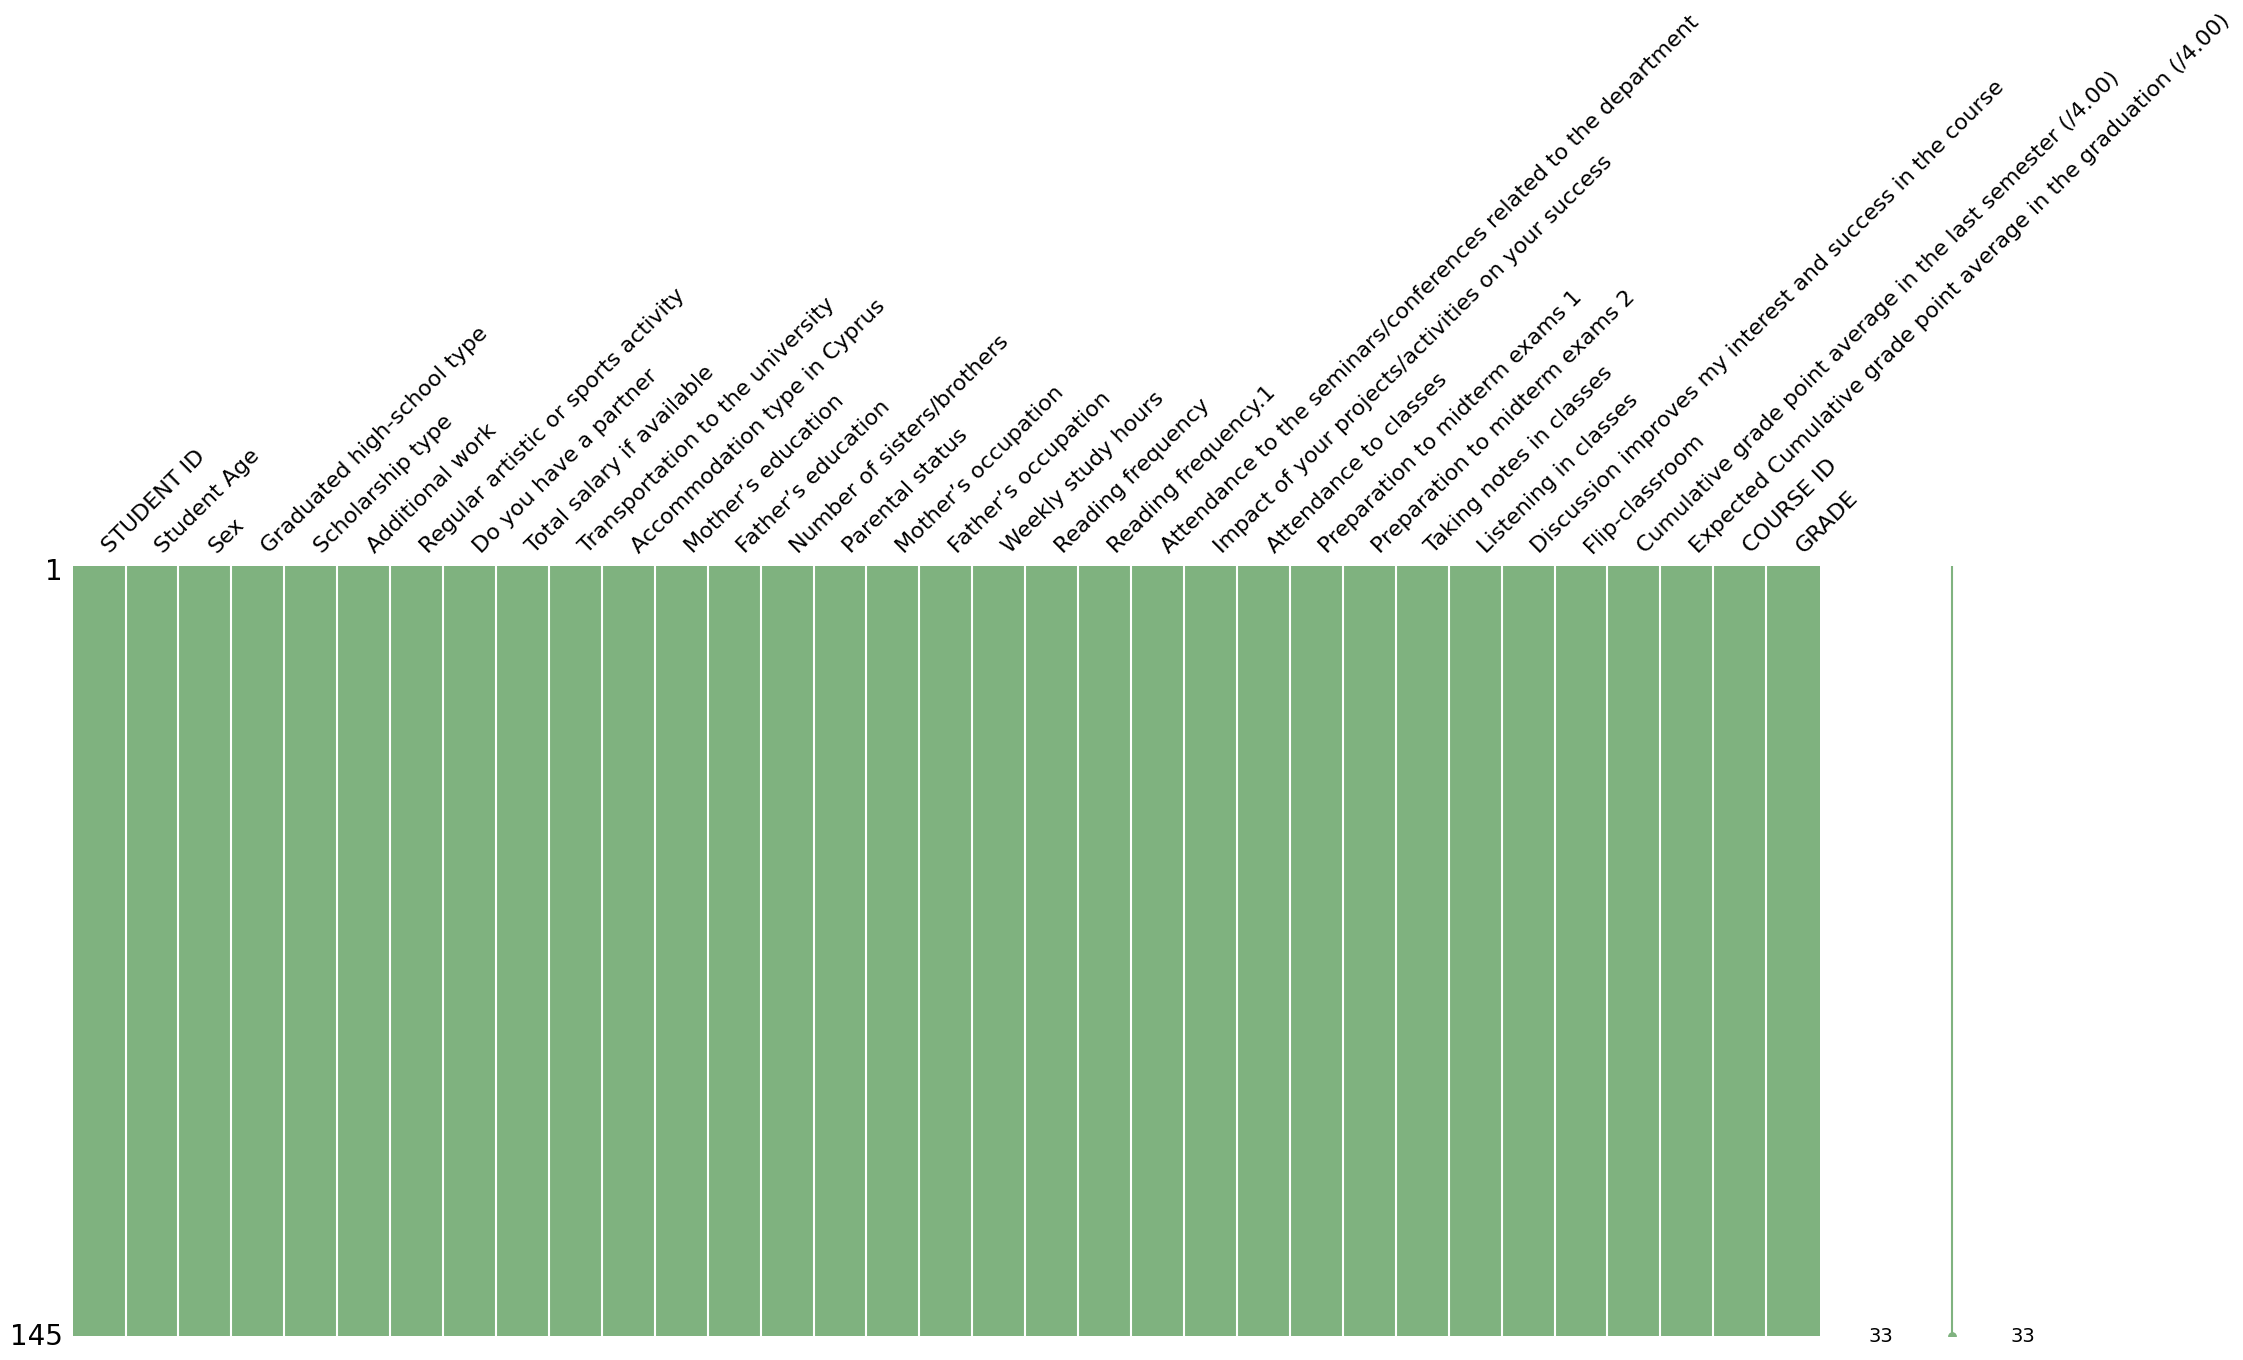

In [237]:
print_dataframe_info(df_perfomance)

Этот набор данных позволяет изучить, как разные вещи, такие как возраст, семейные условия, стипендии или привычки к учебе - то есть большинство важных факторов, которые позволят  прогнозировать успеваемость студентов в конце семестра на Кипре.


### Для каких целей этот датасет может быть использован:

1. Прогностическое моделирование: Исследователи или педагоги могут построить прогностические модели для прогнозирования оценок студентов к концу семестра на основе различных факторов, таких как демографическая информация, семейный фон, образовательные привычки и предыдущая успеваемость.

2. Выявление факторов, влияющих на успеваемость: Анализируя набор данных, можно определить, какие факторы имеют наибольшее влияние на академическую успеваемость студентов. Это поможет образовательным учреждениям создавать меры поддержки или системы поддержки для студентов, находящихся под риском неуспеваемости.

3. Разработка политики: Образовательные политики могут использовать выводы из набора данных для разработки целевых политик, направленных на улучшение результатов студентов. Например, если данные указывают на то, что проблемы с транспортом коррелируют с более низкими оценками, политики могут инвестировать в улучшение транспортных услуг для студентов.

4. Персонализированное образование: Школы или педагоги могут использовать набор данных для персонализации образования для студентов на основе их индивидуальных характеристик и образовательных привычек. Например, если данные показывают, что студенты, занимающиеся регулярно художественной или спортивной деятельностью, склонны к лучшим результатам, школы могут включить больше внеурочных мероприятий в свою учебную программу.

5. Психолого-педагогическое сопровождение и поддержка студентов: Психологи и службы поддержки в образовательных учреждениях могут использовать набор данных для выявления студентов, которые могут нуждаться в дополнительной помощи или руководстве. Например, если родители студента имеют низкий уровень образования, это может указывать на необходимость дополнительной академической поддержки.

## Вывод по анализу датасетов

При анализе данных мы выяснили, что все датасеты предоставляют разные виды данных, схожие в некоторых аспектах, но датасет "Students Perfomance" дает большее количество информации, на основе которых можно делать разные оценки и выводы, также он дает больший пласт для действий в будущем, которые можно совершить используя данный датасет.

## Декодировка информации в выбраном датасете на релевантную

Так как данные в датасете данные представлены в виде баллов, мы декодируем их, используя расшифровку, указанную в описании датасета.

In [238]:
df_perfomance.columns = df_perfomance.columns.str.strip()

decoding_info = {
    'Student Age': {1: '18-21', 2: '22-25', 3: 'above 26'},
    'Sex': {1: 'female', 2: 'male'},
    'Graduated high-school type': {1: 'private', 2: 'state', 3: 'other'},
    'Scholarship type': {1: 'None', 2: '25%', 3: '50%', 4: '75%', 5: 'Full'},
    'Additional work': {1: 'Yes', 2: 'No'},
    'Regular artistic or sports activity': {1: 'Yes', 2: 'No'},
    'Do you have a partner': {1: 'Yes', 2: 'No'},
    'Total salary if available': {
        1: 'USD 135-200', 2: 'USD 201-270', 3: 'USD 271-340', 4: 'USD 341-410', 5: 'above 410'
    },
    'Transportation to the university': {1: 'Bus', 2: 'Private car/taxi', 3: 'bicycle', 4: 'Other'},
    'Accommodation type in Cyprus': {1: 'rental', 2: 'dormitory', 3: 'with family', 4: 'Other'},
    'Mother’s education': {
        1: 'primary school', 2: 'secondary school', 3: 'high school', 4: 'university', 5: 'MSc.', 6: 'Ph.D.'
    },
    'Father’s education': {
        1: 'primary school', 2: 'secondary school', 3: 'high school', 4: 'university', 5: 'MSc.', 6: 'Ph.D.'
    },
    'Number of sisters/brothers': {1: '1', 2: '2', 3: '3', 4: '4', 5: '5 or above'},
    'Parental status': {1: 'married', 2: 'divorced', 3: 'died - one of them or both'},
    'Mother’s occupation': {
        1: 'retired', 2: 'housewife', 3: 'government officer', 4: 'private sector employee', 5: 'self-employment', 6: 'other'
    },
    'Father’s occupation': {
        1: 'retired', 2: 'government officer', 3: 'private sector employee', 4: 'self-employment', 5: 'other'
    },
    'Weekly study hours': {1: 'None', 2: '<5 hours', 3: '6-10 hours', 4: '11-20 hours', 5: 'more than 20 hours'},
    'Reading frequency (non-scientific books/journals)': {1: 'None', 2: 'Sometimes', 3: 'Often'},
    'Reading frequency (scientific books/journals)': {1: 'None', 2: 'Sometimes', 3: 'Often'},
    'Attendance to the seminars/conferences related to the department': {1: 'Yes', 2: 'No'},
    'Impact of your projects/activities on your success': {1: 'positive', 2: 'negative', 3: 'neutral'},
    'Attendance to classes': {1: 'always', 2: 'sometimes', 3: 'never'},
    'Preparation to midterm exams 1': {1: 'alone', 2: 'with friends', 3: 'not applicable'},
    'Preparation to midterm exams 2': {
        1: 'closest date to the exam', 2: 'regularly during the semester', 3: 'never'
    },
    'Taking notes in classes': {1: 'never', 2: 'sometimes', 3: 'always'},
    'Listening in classes': {1: 'never', 2: 'sometimes', 3: 'always'},
    'Discussion improves my interest and success in the course': {1: 'never', 2: 'sometimes', 3: 'always'},
    'Flip-classroom': {1: 'not useful', 2: 'useful', 3: 'not applicable'},
    'Cumulative grade point average in the last semester (/4.00)': {
        1: '<2.00', 2: '2.00-2.49', 3: '2.50-2.99', 4: '3.00-3.49', 5: 'above 3.49'
    },
    'Expected Cumulative grade point average in the graduation (/4.00)': {
        1: '<2.00', 2: '2.00-2.49', 3: '2.50-2.99', 4: '3.00-3.49', 5: 'above 3.49'
    },
    'GRADE': {0: 'Fail', 1: 'DD', 2: 'DC', 3: 'CC', 4: 'CB', 5: 'BB', 6: 'BA', 7: 'AA'}
}

copy_df_perfomance = df_perfomance.copy()

for column in copy_df_perfomance.columns:
    if column in decoding_info:
        copy_df_perfomance[column] = copy_df_perfomance[column].map(decoding_info[column])

copy_df_perfomance.to_csv("df.csv", index=False)

In [239]:
df = pd.read_csv('/content/df.csv')
df.columns = df.columns.str.strip()
# print(df.sample(5))

# Гипотезы

## Краткое описание выбранных гипотез

1. Возраст и успех в учебе: Существует взаимосвязь между возрастной категорией студента и его оценками.

2. Пол и успеваемость: Студенты женского пола получают более высокие оценки, чем студенты мужского пола.

3. Тип школы и успеваемость: Студенты, закончившие частную школу, имеют более высокие оценки, чем студенты из государственных или других школ.

4. Тип стипендии и успеваемость: Студенты с большей стипендией имеют более высокие оценки, чем студенты с меньшей или без стипендии.

5. Дополнительная работа и успеваемость: Студенты, работающие дополнительно, имеют более низкие оценки, чем студенты, которые не работают.

6. Активность в спорте или искусстве и успеваемость: Студенты, занимающиеся спортом или искусством, получают более высокие оценки, чем те, кто не участвует в таких мероприятиях.

7. Наличие партнера и успеваемость: Студенты, имеющие партнера, получают более низкие оценки, чем те, у кого партнера нет.

8. Тип транспорта и успеваемость: Существует взаимосвязь между типом транспорта, используемого студентами, и их успеваемостью.

9. Тип проживания и успеваемость: Студенты, проживающие с семьей, получают более высокие оценки, чем студенты, проживающие в общежитии или на съемной квартире.

10. Образование родителей и успеваемость: Студенты, чьи родители имеют высшее образование, получают более высокие оценки, чем те, у кого родители имеют более низкий уровень образования.

11. Часы обучения и успеваемость: Студенты, которые тратят больше времени на учебу, получают более высокие оценки.

12. Участие в семинарах и успеваемость: Студенты, которые посещают семинары, получают более высокие оценки.

13. Подготовка к экзаменам и успеваемость: Студенты, которые готовятся к экзаменам заранее, получают более высокие оценки, чем те, кто готовится непосредственно перед экзаменом.

14. Стиль заметок и успеваемость: Студенты, которые всегда записывают лекции, получают более высокие оценки, чем те, кто делает это иногда или никогда.

15. Влияние обсуждений и успеваемость: Студенты, которые считают обсуждения полезными, имеют более высокие оценки, чем те, кто не считает это важным.

16. Дополнительная работа и статус отношений родителей: Студенты, у которых родители разведены или один из них погиб, имеют работу

## Наличие партнера и успеваемость (7)

In [240]:
import plotly.express as px

df_grouped = df.groupby(['GRADE', 'Do you have a partner']).size().reset_index(name='count')
df_grouped['normalized_count'] = df_grouped.groupby('GRADE')['count'].transform(lambda x: x / x.sum())

colors = ["#121481", "#FFB1B1"]

fig = px.bar(
    df_grouped,
    x="GRADE",
    y="normalized_count",
    color="Do you have a partner",
    barmode='group',
    category_orders={"GRADE": ["Fail", "DD", "DC", "CC", "CB", "BB", "BA", "AA"]},
    color_discrete_sequence=colors,
    title="Distribution of grades by partner status"
)

fig.update_layout(
    xaxis_title="Grades",
    yaxis_title="Percentage of students",
    font=dict(family="Arial", size=12),
    plot_bgcolor="#f5f5f5",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor="#e5e5e5"),
    legend=dict(title="", orientation="h", y=1.02, xanchor="center", x=0.5),
    bargap=0.15,
)

fig.show()

Гипотеза частично не подтвердилась, так как мы можем заметить, что в большей степени наличие партнера не мешает получению хороших оценок также, как и плохих, но среди тех, кто завалил, можем заметить, что преобладают люди, состоящие в отношениях.

## Дополнительная работа и статус отношений родителей (16)

In [241]:


count_df = df.groupby(['Parental status', 'Additional work']).size().reset_index(name='Count')
count_df['Proportion'] = count_df.groupby('Parental status')['Count'].transform(lambda x: x / x.sum())
count_df_with_work = count_df[count_df['Additional work'] == 'Yes']

# Create the pie chart
fig = px.pie(
    count_df_with_work,
    values='Proportion',
    names='Parental status',
    title='Proportion of Students with Additional Work by Parental Status',
    hole=0.3  # Adding a hole for a donut chart
)

# Customize the appearance
fig.update_traces(
    textinfo='percent',  # Show only the percentage inside the segments
    textfont_size=16,  # Increase text size for better readability
    marker=dict(
        colors=['#E65C19', '#F8D082', '#640D6B'], # Use a visually appealing color palette
        line=dict(color='#FFFFFF', width=2) # Add white outlines for better separation
    )
)

fig.update_layout(
    title_x=0.5, # Center the title
    title_font_family="Arial",
    title_font_size=24,
    legend_title="Parental Status",  # Set legend title
    legend_font_family="Arial",
    legend_font_size=18,
    showlegend=True
)

fig.show()

##

In [245]:

df_melted = pd.melt(
    df,
    id_vars=['STUDENT ID', 'GRADE'],
    value_vars=['Mother’s education', 'Father’s education'],
    var_name='Parent',
    value_name='Education Level'
)

fig = px.box(
    df_melted,
    x='Education Level',
    y='GRADE',
    color='Parent',
    title="Student Grades by Parental Education Level",
    category_orders={
        "GRADE": ["AA", "BA", "BB", "CB", "CC", "DC", "DD", "Fail"],
        'Education Level': ['primary school', 'secondary school', 'high school', 'university', 'MSc.', 'Ph.D.']
    },
    color_discrete_map={'Mother': '#6AD4DD', 'Father': '#7AA2E3'}
)

fig.update_layout(
    xaxis_title="Parental Education Level",
    yaxis_title="Grade",
    xaxis={'type': 'category'}
)

fig.show()

Можно считать, что гипотеза подтвердилась. Как мы можем заметить, до высшей школы включительно оценки у всех примерно равны, но как только у родителей появляется высшее, то оценки студентов явно улучшаются, но родителей с высшим образованием по типу MSc. и Ph.D. достаточно мало, что видно у отцов с Ph.D., который всего один. Точное количество указано ниже:

In [250]:
mother_education_counts = df['Mother’s education'].value_counts()
father_education_counts = df['Father’s education'].value_counts()

print(f"Количество уровней образования у матерей:\n{mother_education_counts}")
print(f"\nКоличество уровней образования у отцов:\n{father_education_counts}")


Количество уровней образования у матерей:
Mother’s education
primary school      54
high school         39
secondary school    27
university          21
MSc.                 2
Ph.D.                2
Name: count, dtype: int64

Количество уровней образования у отцов:
Father’s education
high school         46
secondary school    36
primary school      29
university          28
MSc.                 5
Ph.D.                1
Name: count, dtype: int64


В данном случае блочный график выглядит не объективно, поэтому построим иной график.

In [246]:
grade_mapping = {
    'Fail': 0, 'DD': 1, 'DC': 2, 'CC': 3, 'CB': 4, 'BB': 5, 'BA': 6, 'AA': 7
}
df_melted['GRADE'] = df_melted['GRADE'].map(grade_mapping)

avg_grades = df_melted.groupby(['Education Level', 'Parent'])['GRADE'].mean().reset_index()

fig = px.bar(
    avg_grades,
    x='Education Level',
    y='GRADE',
    color='Parent',
    barmode='group',
    title="Average Student Grade by Parental Education Level",
    category_orders={'Education Level': ['primary school', 'secondary school', 'high school', 'university', 'MSc.', 'Ph.D.']},
    color_discrete_map={'Mother': '#E65C19', 'Father': '#640D6B'}
)

fig.show()